<a href="https://colab.research.google.com/github/paweltaranov/test_prod/blob/master/%22Taranov_Pavel_hw06_visualization_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 6. Визуализация данных

Вся работа состоит из трех больших блоков:

- Базовые операции с датафреймами
- Вычисление новых признаков и группировка данных
- Визуализация данных

**Авторские подсказки**

Во многих заданиях вам даны авторские подсказки - результат выполнения авторского кода для решения этой задачи. Они вам даны просто для понимания, в правильном ли направлении вы идете. Формат вывода вашего кода не обязательно должен совпадать с форматом в подсказках. Ячейки с ответом изменять не рекомендуется - проводите эксперименты в новых.


# Описание задачи

**Задача кредитного скоринга** - одна из наиболее популярных областей в банковской индустрии, где применяется анализ данных

Признаки клиентов банка:

- ```age``` - возраст (вещественный)
- ```MonthlyIncome``` - месячный доход (вещественный)
- ```DebtRatio``` - Debt-to-income Ratio (вещественный)
- ```NumberOfOpenCreditLinesAndLoans``` - число заемов и кредитных линий
- ```NumberRealEstateLoansOrLines``` - число ипотек и заемов, связанных с недвижимостью (натуральное число)
- ```NumberOfDependents``` - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)
- ```defaulted``` - выплачен или не выплачен в конечном итоге кредит заемщиком

В этой работе мы будем исследовать данные о заемщиках и научимся отвечать на вопросы о предоставленных нам данных.

# Базовые операции с датафреймами

## Задача 1

Скачайте набор данных:

In [ ]:
!gdown 1Y327Wvlw1GVY1SSTJ4g6DuTujCFc5TsH

Downloading...
From: https://drive.google.com/uc?id=1Y327Wvlw1GVY1SSTJ4g6DuTujCFc5TsH
To: /content/credit_data.csv
100% 4.55M/4.55M [00:00<00:00, 210MB/s]


Считайте файл ```credit_data.csv``` в переменную ```df```:

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/credit_data.csv')
df.head()

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,45,0.802982,9120.0,13,6,2.0
1,0,40,0.121876,2600.0,4,0,1.0
2,0,38,0.085113,3042.0,2,0,0.0
3,0,30,0.036050,3300.0,5,0,0.0
4,0,49,0.024926,63588.0,7,1,0.0


Определите размер таблицы:

In [ ]:
df.shape

(150000, 7)

```(150000, 7)```

Посмотрите первые пять строк:

In [ ]:
df.head()

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,45,0.802982,9120.0,13,6,2.0
1,0,40,0.121876,2600.0,4,0,1.0
2,0,38,0.085113,3042.0,2,0,0.0
3,0,30,0.036050,3300.0,5,0,0.0
4,0,49,0.024926,63588.0,7,1,0.0


Выведите список названий столбцов:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   defaulted                        150000 non-null  int64  
 1   age                              150000 non-null  int64  
 2   DebtRatio                        150000 non-null  float64
 3   MonthlyIncome                    120269 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans  150000 non-null  int64  
 5   NumberRealEstateLoansOrLines     150000 non-null  int64  
 6   NumberOfDependents               146076 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 8.0 MB


In [ ]:
df.columns.tolist()

['defaulted',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

In [ ]:
df.keys().tolist()

['defaulted',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

```
['defaulted',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']
 ```

## Задача 2

Определите число пропусков в каждом столбце (могут пригодиться методы ```isnull``` и ```sum```):

In [ ]:
import numpy as np

In [ ]:
#help(np.sum)
#help(np.mean)

In [ ]:
null_total = np.sum(df.isnull(), axis=0)
null_total

defaulted                              0
age                                    0
DebtRatio                              0
MonthlyIncome                      29731
NumberOfOpenCreditLinesAndLoans        0
NumberRealEstateLoansOrLines           0
NumberOfDependents                  3924
dtype: int64


```
defaulted                              0
age                                    0
DebtRatio                              0
MonthlyIncome                      29731
NumberOfOpenCreditLinesAndLoans        0
NumberRealEstateLoansOrLines           0
NumberOfDependents                  3924
dtype: int64
```



Определите долю пропусков в каждом столбце (могут пригодиться методы ```isnull``` и ```mean```):

In [ ]:
# модификация запроса №1
null_proc = np.mean(df.isnull(), axis=0)
# модификация запроса №2
null_proc2 = df.isnull().mean(axis=0)
null_proc2

defaulted                          0.000000
age                                0.000000
DebtRatio                          0.000000
MonthlyIncome                      0.198207
NumberOfOpenCreditLinesAndLoans    0.000000
NumberRealEstateLoansOrLines       0.000000
NumberOfDependents                 0.026160
dtype: float64

```
defaulted                          0.000000
age                                0.000000
DebtRatio                          0.000000
MonthlyIncome                      0.198207
NumberOfOpenCreditLinesAndLoans    0.000000
NumberRealEstateLoansOrLines       0.000000
NumberOfDependents                 0.026160
dtype: float64
```

Отметим неполноту данных о доходах у 19,8% заемщиков


## Задача 3

Определите долю заемщиков, которые не выплатили кредит (колонка ```defaulted```):

In [ ]:
df['defaulted']

0         1
1         0
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: defaulted, Length: 150000, dtype: int64

In [ ]:
# посмотрим содержимое поля 'defaulted'
df['defaulted'].value_counts()

0    139974
1     10026
Name: defaulted, dtype: int64

In [ ]:
# определим долю дефолтных кредитов
df['defaulted'].mean()

0.06684

```0.06684```

## Задача 4

Определите количество заемщиков, у которых ежемесячный доход ```MonthlyIncome``` выше среднего:

In [ ]:
df.head()

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,45,0.802982,9120.0,13,6,2.0
1,0,40,0.121876,2600.0,4,0,1.0
2,0,38,0.085113,3042.0,2,0,0.0
3,0,30,0.036050,3300.0,5,0,0.0
4,0,49,0.024926,63588.0,7,1,0.0


In [ ]:
# определим средний доход
Income_avg = df['MonthlyIncome'].mean()
# определим число заемщиков с доходом выше, чем средний доход
len(df[df['MonthlyIncome'] > Income_avg])

44146

```44146```

## Задача 5

Вычислите медианный возраст заемщиков, которые не вернули кредит (```defaulted=1```):

In [ ]:
# составим датасет из дефолтных заемщиков
df[df['defaulted'] == 1]

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,45,0.802982,9120.0,13,6,2.0
13,1,40,0.382965,13700.0,9,1,2.0
21,1,38,0.475841,3000.0,7,1,2.0
25,1,50,1.595253,4676.0,14,3,1.0
51,1,31,0.824725,3000.0,10,2,1.0
...,...,...,...,...,...,...,...
149954,1,46,170.398010,401.0,3,0,2.0
149955,1,41,0.845887,7500.0,12,4,0.0
149961,1,31,0.176732,1125.0,4,0,0.0
149968,1,55,0.064116,4600.0,2,0,6.0


In [ ]:
# составим датасет из дефолтных заемщиков
defaulted = df[df['defaulted'] == 1]
# определим медиану по возрасту дефолтных заемщиков
defaulted['age'].median()

45.0

```45.0```

Проверьте, больше ли он или меньше медианного возраста всех заемщиков:

In [ ]:
x = df['age'].median()
y = defaulted['age'].median()
display(f'''Медианный возраст всех заемщиков {x} лет''',  
f'''Медианный возраст дефолтных заемщиков {y} лет''')

'Медианный возраст всех заемщиков 52.0 лет'

'Медианный возраст дефолтных заемщиков 45.0 лет'

In [ ]:
# display - позволяет вывести несколько сущностей, а не последную
display(f'''Медианный возраст всех заемщиков {x} лет''')
display(f'''Медианный возраст дефолтных заемщиков {y} лет''')

'Медианный возраст всех заемщиков 52.0 лет'

'Медианный возраст дефолтных заемщиков 45.0 лет'

In [ ]:
# Больше ли медианный возраст дефолтных заемщиков чем возраст всех заемщиков?
y > x

False

## Задача 6

Вычислите сколько заемщиков старше 40 лет имеют ежемесячный доход больше среднего ежемесячного дохода по всей выборке:

In [ ]:
df.head()

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,45,0.802982,9120.0,13,6,2.0
1,0,40,0.121876,2600.0,4,0,1.0
2,0,38,0.085113,3042.0,2,0,0.0
3,0,30,0.036050,3300.0,5,0,0.0
4,0,49,0.024926,63588.0,7,1,0.0


In [ ]:
# сформулируем составлное условие и рассчитаем искомое число
sum((df['MonthlyIncome'] > df['MonthlyIncome'].mean()) & (df['age'] > 40))

37629

```37629```

# Вычисление новых признаков и группировка данных

## Задача 7 

Вычислите новый признак ```age_group``` на основе признака ```age```, который разбивает заемщиков на 3 возрастные группы:
- до 30 лет включительно (операция ```<=```) - **группа 1**
- от 30 лет не включительно и до 50 лет включительно - **группа 2**
- строго старше 50 лет - **группа 3**

Для этого заведите отдельную функцию `calculate_age_group` и передайте ее в метод `apply`, который позовете от столбца `age`:

In [ ]:
def calculate_age_group(x):
  if x <= 30:
    result = 'группа 1'
  elif x > 50:
    result = 'группа 3'
  else:
    result = 'группа 2'
  return result

df['age_group'] = df.apply(lambda y: calculate_age_group(y['age']), axis = 1)
df.head()


,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group
0,1,45,0.802982,9120.0,13,6,2.0,группа 2
1,0,40,0.121876,2600.0,4,0,1.0,группа 2
2,0,38,0.085113,3042.0,2,0,0.0,группа 2
3,0,30,0.036050,3300.0,5,0,0.0,группа 1
4,0,49,0.024926,63588.0,7,1,0.0,группа 2


## Задача 8

Вычислите количество заемщиков в каждой группе нового вычисленного признака `age_group` с помощью метода `value_counts`:

In [ ]:
df['age_group'].value_counts()

группа 3    79866
группа 2    59376
группа 1    10758
Name: age_group, dtype: int64

```
3    79866
2    59376
1    10758
Name: age_group, dtype: int64
```

## Задача 9

Посчитайте долю заемщиков, которые не вернули кредит, в каждой из вычисленных возрастных групп (группировка по возрастной группе и применение метода `mean` к колонке `defaulted`):

In [ ]:
# распределение заемщиков по группам
z = df['age_group'].value_counts()
z

группа 3    79866
группа 2    59376
группа 1    10758
Name: age_group, dtype: int64

In [ ]:
# распределение дефолных заемщиков по группам
default_table = df[df['defaulted'] == 1]
default_table['age_group'].value_counts()

группа 2    5283
группа 3    3499
группа 1    1244
Name: age_group, dtype: int64

In [ ]:
# или без создания промежуточной таблицы
df[df['defaulted'] == 1]['age_group'].value_counts()


группа 2    5283
группа 3    3499
группа 1    1244
Name: age_group, dtype: int64

In [ ]:
df[df['age_group']=='группа 1']['defaulted'].mean()

0.11563487637107268

In [ ]:
df[df['age_group']=='группа 2']['defaulted'].mean()

0.08897534357316088

In [ ]:
df[df['age_group']=='группа 3']['defaulted'].mean()

0.04381088322940926

In [ ]:
result = {'группа 1': df[df['age_group']=='группа 1']['defaulted'].mean(), 
     'группа 2': df[df['age_group']=='группа 2']['defaulted'].mean(), 
     'группа 3': df[df['age_group']=='группа 3']['defaulted'].mean()}
result

{'группа 1': 0.11563487637107268,
 'группа 2': 0.08897534357316088,
 'группа 3': 0.04381088322940926}

In [ ]:
result_lst = np.array([
    df[df['age_group']=='группа 1']['defaulted'].mean(), 
    df[df['age_group']=='группа 2']['defaulted'].mean(), 
    df[df['age_group']=='группа 3']['defaulted'].mean()])
result_lst

array([0.11563488, 0.08897534, 0.04381088])

In [ ]:
# решим задачу с использованием функции groupby 
grouper = df.groupby(['age_group'])
print(grouper)

In [ ]:
# т.е. вывод df после groupby не имеет смысла 
# без функции агрегации к определенным полям
df_0 = pd.DataFrame(grouper)
display(df_0)

,0,1
0,группа 1,defaulted age DebtRatio MonthlyInc...
1,группа 2,defaulted age DebtRatio MonthlyIn...
2,группа 3,defaulted age DebtRatio MonthlyIn...


In [ ]:
# решим задачу с использованием функции groupby и сравним результаты
grouper = df.groupby(['age_group'])
grouper['defaulted'].mean()
# или в одну строку
df.groupby(['age_group'])['defaulted'].mean()

age_group
группа 1    0.115635
группа 2    0.088975
группа 3    0.043811
Name: defaulted, dtype: float64

## Задача 10

Визуализируйте полученные данные в виде гистограммы. Добавьте сетку на график, дайте графику название:

In [ ]:
# Импортируем модуль для визуализации данных
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
result_lst = result_lst * 100
result_lst

array([11.56348764,  8.89753436,  4.38108832])

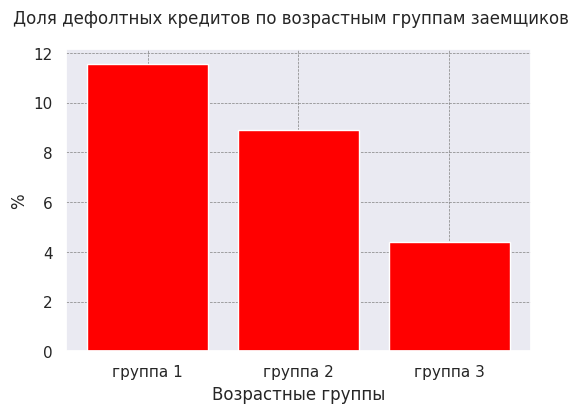

In [ ]:
x = np.array(['группа 1', 'группа 2', 'группа 3'])
y = np.array(result_lst)
fig = plt.figure(
    figsize=(6,4),  
    #facecolor='whitesmoke',  
    dpi=100
)

plt.suptitle('Доля дефолтных кредитов по возрастным группам заемщиков', fontsize=12)
plt.xlabel('Возрастные группы')
plt.ylabel('%')
plt.bar(x, y, color = "red")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

## Задача 11

Какие выводы вы можете сделать? С увеличением возраста заемщика риск невозврата кредита становится больше или меньше? Дайте ответ на вопрос в текстовой ячейке ниже:

**Ответ:**
Можно заметить, что с увеличем возраста риск невозврата кредита становится меньше. Этому возможно способствуют следующие объективные факторы: 
1. с возврастом заемщики становятся более опытными и лучше планируют свои доходы и расходы;
2. увеличение количества социальных ролей повышает общий уровень ответственности;
3. с возврастом заемщики обычно становятся более платежеспособными. 


## Задача 12

Вычислите новый признак `alone_and_poor`, который равен `1` у заемщиков, которые не содержат никого, кроме себя (`NumberOfDependents == 0`) и у которых месячный доход (`MonthlyIncome`) меньше 10% квантили по этому признаку среди всех заемщиков. Иначе этот признак сделайте равным 0.

Для этого напишите функцию `calculate_alone_and_poor`, в которой вы будете принимать строку, доставать нужные поля у этой строки, и проверять перечисленные выше условия.

Заранее посчитайте значение 10% квантили по столбцу `MonthlyIncome`, и передайте это значение в функцию как аргумент по-умолчанию.

Затем полученную функцию примените ко всему датафрейму с помощью метода `apply`. Не забудьте указать параметр `axis=1` в методе `apply` (применять переданную функцию ко строкам), иначе код упадет с ошибкой.

In [ ]:
# 10%-квантиль
# Pandas DataFrame quantile() Method https://www.w3schools.com/python/pandas/ref_df_quantile.asp
# df['age_group'] = df.apply(lambda y: calculate_age_group(y['age']), axis = 1)

In [ ]:
from pandas.core.array_algos import quantile
arr = df['MonthlyIncome']
quant10 = arr.quantile(0.1)
quant10             

2005.0

In [ ]:
df.head(2)

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group
0,1,45,0.802982,9120.0,13,6,2.0,группа 2
1,0,40,0.121876,2600.0,4,0,1.0,группа 2


In [ ]:
def calculate_alone_and_poor(Number, Income):
  if Number == 0 and Income < quant10:
    return 1
  return 0

df['alone_and_poor'] = df.apply(lambda y: calculate_alone_and_poor(y['NumberOfDependents'], y['MonthlyIncome']), axis = 1)
df.head()

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group,alone_and_poor
0,1,45,0.802982,9120.0,13,6,2.0,группа 2,0
1,0,40,0.121876,2600.0,4,0,1.0,группа 2,0
2,0,38,0.085113,3042.0,2,0,0.0,группа 2,0
3,0,30,0.036050,3300.0,5,0,0.0,группа 1,0
4,0,49,0.024926,63588.0,7,1,0.0,группа 2,0


Сколько получилось людей с признаком ```alone_and_poor``` равным 1?

In [ ]:
# число людей с признаком alone_and_poor
sum(df['alone_and_poor'] == 1)

8719

In [ ]:
# доля людей с признаком alone_and_poor, %
df['alone_and_poor'].mean()*100

5.812666666666667

# Визуализация данных

## Задача 13

Постройте гистограмму распределения возрастов всех заемщиков. Для этого вам может понадобиться метод `plot.hist()`. Обратите внимание, что у метода `hist()` есть параметр `bins`, который отвечает за мелкость разбиения гистограммы. Постройте два отдельных графика с параметрами `bins=10` и `bins=30`.

Подпишите оси, добавьте сетку на графики, дайте графикам название.

Также не забывайте, что чтобы картинка отрисовалась корректно, нужно последней строкой кода написать `plt.show()`.

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# смелые банки выдавали кредиты, видимо, вслепую
df['age'].max()

109

In [ ]:
# сформируем массив данных для графика
age_arr = np.array(sorted(df['age']))
age_arr

array([  0,  21,  21, ..., 107, 109, 109])

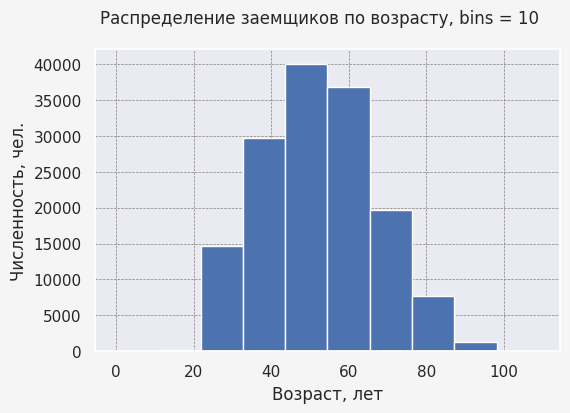

In [ ]:
# Распределение заемщиков по возрасту, bins = 10
fig = plt.figure(
    figsize=(6,4),  
    facecolor='whitesmoke',  
    dpi=100
)
plt.suptitle('Распределение заемщиков по возрасту, bins = 10', fontsize=12)
plt.xlabel('Возраст, лет')
plt.ylabel('Численность, чел.')
plt.hist(age_arr, bins = 10)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.show()

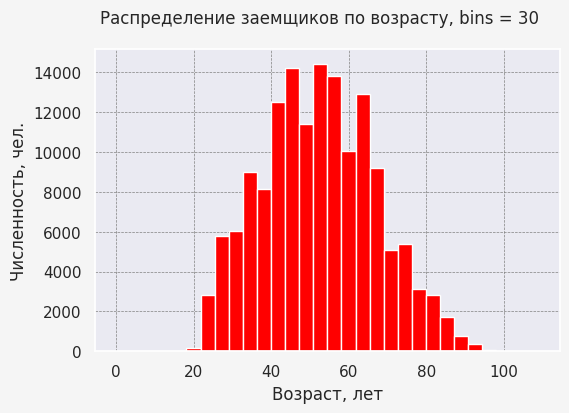

In [ ]:
# Распределение заемщиков по возрасту, bins = 30
fig = plt.figure(
    figsize=(6,4),  
    facecolor='whitesmoke',  
    dpi=100
)
plt.suptitle('Распределение заемщиков по возрасту, bins = 30', fontsize=12)
plt.xlabel('Возраст, лет')
plt.ylabel('Численность, чел.')
plt.hist(age_arr, color = "red", bins = 30)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.show()

## Задача 14

Теперь постройте гистограмму распределения числа открытых кредитных линий (`NumberOfOpenCreditLinesAndLoans`) с помощью функции `distplot()` из модуля `seaborn`.

Подпишите оси, добавьте сетку на графики, дайте графику название:

In [ ]:
# distplot()
# https://seaborn.pydata.org/tutorial/introduction.html

In [ ]:
# sorted(df["NumberOfOpenCreditLinesAndLoans"], reverse = True)

In [ ]:
# Посмотрим на выборку по полю NumberOfOpenCreditLinesAndLoans
df["NumberOfOpenCreditLinesAndLoans"].max()
df["NumberOfOpenCreditLinesAndLoans"].value_counts().head(10)
df["NumberOfOpenCreditLinesAndLoans"].value_counts().tail(10)

52    3
46    3
57    2
51    2
56    2
47    2
50    2
44    2
58    1
53    1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

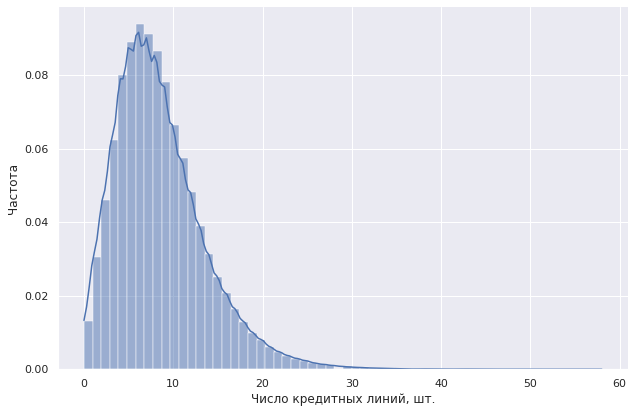

In [ ]:
# построим график распределения по числу кредитных линий ("NumberOfOpenCreditLinesAndLoans")
# испльзуем флаг density (плотность) в displot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply the default theme
# sns.set_theme()

# не смог разместить график в область с figsize=(6,8)!
#fig, ax = plt.subplots()
#plt.figure(figsize=(6,8))

g = sns.displot(data=df, stat="density",  x="NumberOfOpenCreditLinesAndLoans",  bins=60, kde=True);
# задавать размеры графика для библиотеки seaborn, похоже, нужно так:
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

plt.xlabel('Число кредитных линий, шт.')
plt.ylabel('Частота')

plt.show()

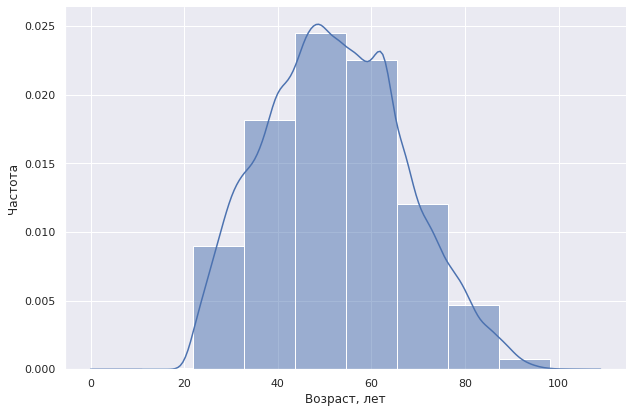

In [ ]:
# для cравнения построим график распределения по возрастам заемщиков ("age")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.displot(data=df, stat="density", x="age",  bins=10, kde=True );
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

plt.xlabel('Возраст, лет')
plt.ylabel('Частота')

plt.show()

## Задача 15

Постройте гистограмму распределения признака `NumberOfDependents` для заемщиков, которые успешно вернули кредит (`defaulted = 0`).

Подпишите оси, добавьте сетку на графики, дайте графику название:

In [ ]:
# определем массив-выборку для построения графика
df[df['defaulted'] == 0]['NumberOfDependents']
# посмотрим на распределение в форме таблицы
df[df['defaulted'] == 0]['NumberOfDependents'].value_counts()

0.0     81807
1.0     24381
2.0     17938
3.0      8646
4.0      2565
5.0       678
6.0       134
7.0        46
8.0        22
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

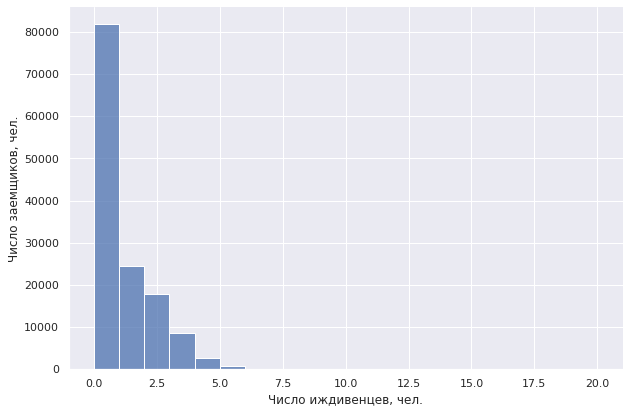

In [ ]:
# построим график распределения с bins=20 
# (максимальное число по NumberOfDependents в выборке = 20)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dx = pd.DataFrame(df[df['defaulted'] == 0])  #['NumberOfDependents']
# dx = df[df['defaulted'] == 0]

g = sns.displot(data=dx, x="NumberOfDependents",  bins=20  );
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

plt.xlabel('Число иждивенцев, чел.')
plt.ylabel('Число заемщиков, чел.')

plt.show()

## Задача 16

Вычислите среднее значение признака `NumberOfDependents` для каждого возраста (`groupby` по возрасту и `mean` от столбца `NumberOfDependents`) и постройте гистограмму распределения полученных значений (`plot.bar()`).

Сделайте график покрупнее, например 14 на 10 дюймов с помощью параметра `figsize`.

Подпишите оси, добавьте сетку на графики, дайте графику название.

In [ ]:
# график ПОСЛЕ коррекции
# среднее значение признака для каждого возраста ('age')
df.head()
number_age = df.groupby('age')
result_number_age = number_age['NumberOfDependents'].mean()
result_number_age

age
0      2.000000
21     0.032895
22     0.042929
23     0.113523
24     0.130263
         ...   
102    0.333333
103    0.000000
105         NaN
107    0.000000
109         NaN
Name: NumberOfDependents, Length: 86, dtype: float64

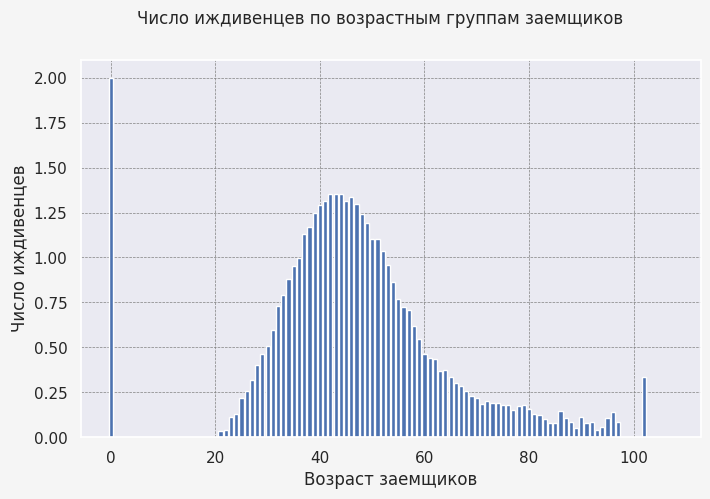

In [ ]:
# Импортируем модуль для визуализации данных
from matplotlib import pyplot as plt
import numpy as np

x = np.array(result_number_age.keys())
y = np.array(result_number_age)
fig = plt.figure(
    figsize=(8,5),  
    facecolor='whitesmoke',  
    dpi=100
)

plt.suptitle('Число иждивенцев по возрастным группам заемщиков', fontsize=12)
plt.xlabel('Возраст заемщиков')
plt.ylabel('Число иждивенцев')
plt.bar(x, y)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

**Вывод: Очевидно, что имеется аномальные выборосы для возраста "0 лет" и для "102 лет"**


In [ ]:
# первоначальный график ДО коррекции
# среднее значение признака по возрастным группам 1, 2, 3 ('age_group')
df.head()
number = df.groupby('age_group')
number

In [ ]:
df.head()
number = df.groupby('age_group')

In [ ]:
# посмотрим содержимое сгруппированного датафрейма
#for name, group in number:
#    print(name)
#    print(group)

In [ ]:
result_number = number['NumberOfDependents'].mean()
result_number

age_group
группа 1    0.333269
группа 2    1.170353
группа 3    0.499390
Name: NumberOfDependents, dtype: float64

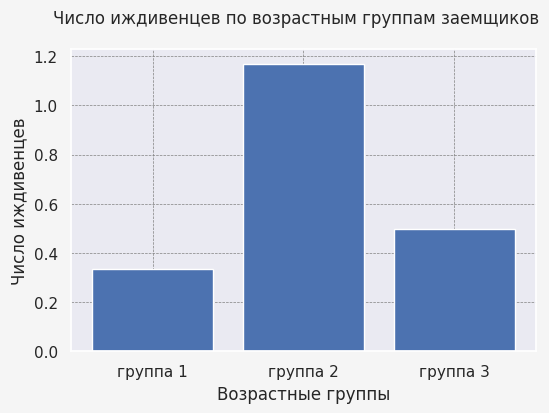

In [ ]:
# Импортируем модуль для визуализации данных
from matplotlib import pyplot as plt
import numpy as np

x = np.array(['группа 1', 'группа 2', 'группа 3'])
y = np.array(result_number)
fig = plt.figure(
    figsize=(6,4),  
    facecolor='whitesmoke',  
    dpi=100
)

plt.suptitle('Число иждивенцев по возрастным группам заемщиков', fontsize=12)
plt.xlabel('Возрастные группы')
plt.ylabel('Число иждивенцев')
plt.bar(x, y)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

In [ ]:
# агрегированный график выше не позволил увидеть аномальные выбросы 

## Задача 17

Видите ли вы теперь какие-то аномалии в данных? Определите, что это за аномалии, и очистите данные от этих аномалий. Затем снова постройте такой же график, как в предыдущем задании, только уже на датафрейме с очищенными выбросами:

In [ ]:
# Очевидно, что имеется аномальные выборосы для возраста "0 лет" и для "102 лет"
number_age = df.groupby('age')
result_number_age = number_age['NumberOfDependents'].mean()
result_number_age


age
0      2.000000
21     0.032895
22     0.042929
23     0.113523
24     0.130263
         ...   
102    0.333333
103    0.000000
105         NaN
107    0.000000
109         NaN
Name: NumberOfDependents, Length: 86, dtype: float64

In [ ]:
result_number_age

age
0      2.000000
21     0.032895
22     0.042929
23     0.113523
24     0.130263
         ...   
102    0.333333
103    0.000000
105         NaN
107    0.000000
109         NaN
Name: NumberOfDependents, Length: 86, dtype: float64

In [ ]:
# создадим новую выборку
result_number_age_new = result_number_age[:]
id(result_number_age_new) == id(result_number_age)
result_number_age_new is result_number_age

False

In [ ]:
# обнулим аномальные значения признака для "0 лет" и "102 лет"
result_number_age_new[0] = 0
result_number_age_new[102] = 0
# устраним возраст "0 лет" из выборки
result_number_age_new = result_number_age_new[1:]
result_number_age_new

age
21     0.032895
22     0.042929
23     0.113523
24     0.130263
25     0.218922
         ...   
102    0.000000
103    0.000000
105         NaN
107    0.000000
109         NaN
Name: NumberOfDependents, Length: 85, dtype: float64

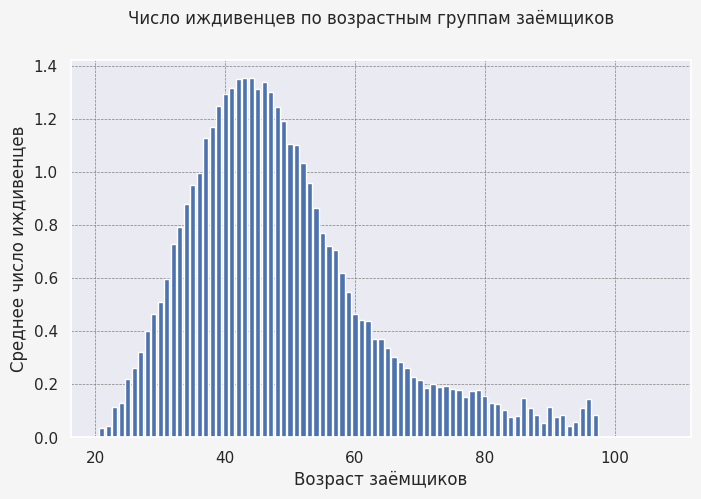

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

x = np.array(result_number_age_new.keys())
y = np.array(result_number_age_new)
fig = plt.figure(
    figsize=(8,5),  
    facecolor='whitesmoke',  
    dpi=100
)

plt.suptitle('Число иждивенцев по возрастным группам заёмщиков', fontsize=12)
plt.xlabel('Возраст заёмщиков')
plt.ylabel('Среднее число иждивенцев')
plt.bar(x, y)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()